In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files
files.upload()
df = pd.read_csv("Social_Network_Ads.csv")
df = df.iloc[:,2:]
df.head()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'],test_size= 0.2,random_state=0)
print(x_train)

     Age  EstimatedSalary
336   58           144000
64    59            83000
55    24            55000
106   26            35000
300   58            38000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[320 rows x 2 columns]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled.mean())

0.4441369047619047


In [7]:
#After standardization it convert data into numpy form so we use pd.dataframe to make back to data frame
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
print(x_test_scaled)
round(x_train_scaled.describe(),1)

         Age  EstimatedSalary
0   0.285714         0.533333
1   0.476190         0.259259
2   0.404762         0.444444
3   0.285714         0.474074
4   0.404762         0.259259
..       ...              ...
75  0.000000         0.496296
76  0.571429         0.474074
77  0.523810         0.333333
78  0.833333         0.140741
79  0.690476         0.681481

[80 rows x 2 columns]


,Age,EstimatedSalary
count,320.0,320.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


WHY SCALING IS IMPORTANT


Before Scaling:


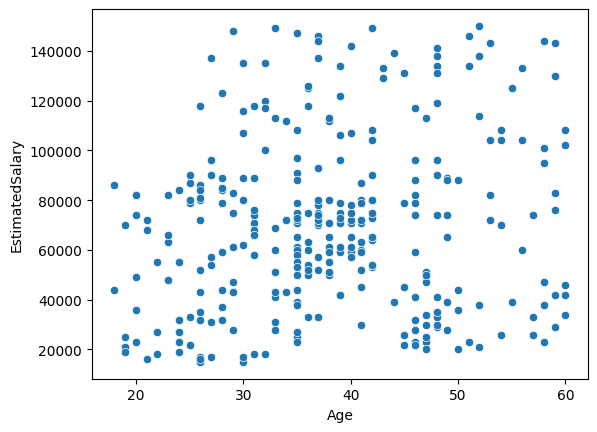

After Scaling:


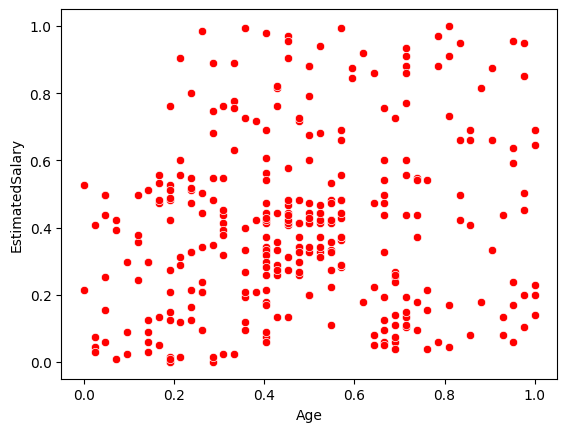

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Before Scaling:")
sns.scatterplot(x = x_train['Age'],y = x_train['EstimatedSalary'])
plt.show()
print("After Scaling:")
sns.scatterplot(x = x_train_scaled['Age'],y = x_train_scaled['EstimatedSalary'],color = 'red')
plt.show()

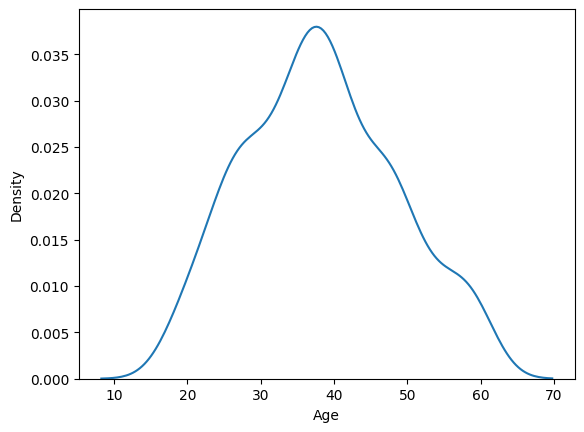

<Axes: xlabel='Age', ylabel='Density'>

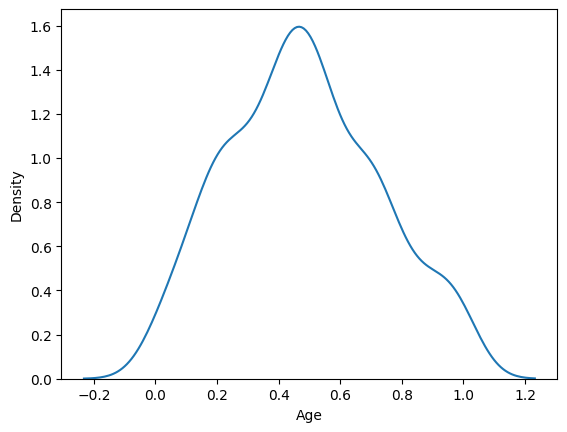

In [9]:
sns.kdeplot(x_train['Age'])
plt.show()
sns.kdeplot(x_train_scaled['Age'])
# same distribution